##Evaluation Tasks

**Use random_state=42 when using sklearn.model_selection.train_test_split**


**Task 1: Print Confusion Matrix, F1-Score, Classification Report for a binary logisitic regression classifier**

In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# DO NOT MODIFY! SIMPLY RUN THE CELL!

# Step 1: Create an imbalanced dataset with 5 classes and split into train and test sets
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=5, n_classes=2,
                           weights=[0.8, 0.2], n_informative=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
# Step 2: Build and train a Logistic Regression model with max_iter=10000
logreg_model = LogisticRegression(max_iter=10000)
logreg_model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [42]:
# Step 3: Make predictions on the testing dataset
pred = logreg_model.predict(X_test)

In [43]:
# Step 4: Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
# manually WITHOUT sklearn
# HINT: Think about np.sum and boolean operations (==, &)
# (15 points)

num_tp = 0 # true pos
num_tn = 0 # true neg
num_fp = 0 # false pos
num_fn = 0 # false neg

for i in range(len(pred)):
  if pred[i] == 1 and y_test[i] == 1:
    num_tp += 1
  elif pred[i] == 0 and y_test[i] == 0:
    num_tn += 1
  elif pred[i] == 1 and y_test[i] == 0:
    num_fp += 1
  elif pred[i] == 0 and y_test[i] == 1:
    num_fn += 1

print(f"TP: {num_tp}  TN: {num_tn} FP: {num_fp}  FN: {num_fn}")


TP: 8  TN: 44 FP: 3  FN: 5


In [44]:
# Step 5: Calculate precision, recall, and F1-score manually using the TP, TN, FP, FN calculated in Step 4
# Refer to the slides for the formula
# (6 points)

newRecall = num_tp/(num_tp + num_fn)
newPrecision = num_tp/(num_tp + num_fp)
newF1 = (2 * num_tp)/((2 * num_tp) + num_fn + num_fp)


In [45]:
# Step 6: Calculate precision, recall, and F1-score using sklearn.metrics and compare against (i.e print) the results from Step 5
# (4 points)

sk_Recall = recall_score(y_test, pred)
sk_precision = precision_score(y_test, pred)
sk_F1 = f1_score(y_test, pred)

print(f"My Recall: {newRecall}")
print(f"SK Recall: {sk_Recall}")
print(f"My Precision: {newPrecision}")
print(f"SK Precision: {sk_precision}")
print(f"My F1: {newF1}")
print(f"SK F1: {sk_F1}")


My Recall: 0.6153846153846154
SK Recall: 0.6153846153846154
My Precision: 0.7272727272727273
SK Precision: 0.7272727272727273
My F1: 0.6666666666666666
SK F1: 0.6666666666666667


In [46]:
# Step 7: Calculate confusion matrix and classification report and print them
# (5 points)

con_mat = confusion_matrix(y_test, pred)
print(f"Confusion Matrix: \n{con_mat}")

classific_report = classification_report(y_test, pred)
print(f"Classification Report: \n{classific_report}")

Confusion Matrix: 
[[44  3]
 [ 5  8]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        47
           1       0.73      0.62      0.67        13

    accuracy                           0.87        60
   macro avg       0.81      0.78      0.79        60
weighted avg       0.86      0.87      0.86        60



Text(0.5, 1.0, 'Confusion Matrix')

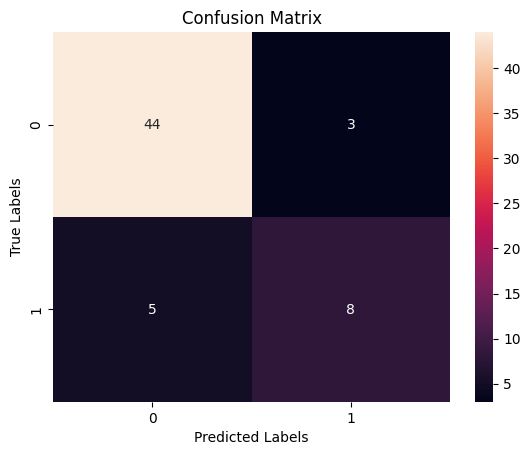

In [47]:
#Step 9: Plot confusion matrix using sns.heatmap with annot=True and fmt='d' and the appropriate xlabel and ylabel
# (10 points)

from pandas.core.frame import find_common_type
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

ConMat_HM = sns.heatmap(con_mat, annot=True, fmt="d")
ConMat_HM.set_xlabel("Predicted Labels")
ConMat_HM.set_ylabel("True Labels")
ConMat_HM.set_title("Confusion Matrix")



**Task 2: Print Confusion Matrix, F1-Score, Classification Report for a multi-class logisitic regression classifier**



In [48]:
# DO NOT MODIFY! SIMPLY RUN THE CELL!

# Step 1: Load the dataset and split into train and test sets

from sklearn.datasets import make_classification

# Define the class distribution weights for 5 classes
class_weights = [0.1, 0.2, 0.2, 0.2, 0.3]

# Create an imbalanced dataset with 5 classes
X, y = make_classification(n_samples=1000,  n_features=20, n_classes=5,
                           weights=class_weights, n_informative=5,
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
# Step 2: Build and train a multiclass classification model (Logistic Regression with max_iter=10000)

logreg_model = LogisticRegression(max_iter = 10000)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [50]:
# Step 3: Make predictions on the testing dataset

pred = logreg_model.predict(X_test)

In [51]:
# Step 4: Calculate and print multiclass classification report
# (5 points)

mcReport = classification_report(y_test, pred)
print(f"Multi-Class Report: \n{mcReport}")

Multi-Class Report: 
              precision    recall  f1-score   support

           0       0.45      0.12      0.19        41
           1       0.60      0.74      0.66        57
           2       0.50      0.65      0.56        57
           3       0.28      0.12      0.17        67
           4       0.55      0.82      0.66        78

    accuracy                           0.52       300
   macro avg       0.48      0.49      0.45       300
weighted avg       0.48      0.52      0.47       300



In [52]:
# Step 5: Compute and print confusion matrix
# (5 points)

con_mat = confusion_matrix(y_test, pred)
print(f"Confusion Matrix: \n{con_mat}")


Confusion Matrix: 
[[ 5  7  8  8 13]
 [ 4 42  8  2  1]
 [ 0  8 37  8  4]
 [ 2  4 19  8 34]
 [ 0  9  2  3 64]]


In [53]:
# Step 6: Compute and print precision, recall, f1 using micro, macro, and weighted averaging using sklearn.metrics package
# HINT: there are 3x3 = 9 numbers to compute
# (10 points)

# Micro-average
microP = precision_score(y_test, pred, average="micro")
microR = recall_score(y_test, pred, average="micro")
microF = f1_score(y_test, pred, average="micro")
# Macro-average
macroP = precision_score(y_test, pred, average="macro")
macroR = recall_score(y_test, pred, average="macro")
macroF = f1_score(y_test, pred, average="macro")
# Weighted-average
weightedP = precision_score(y_test, pred, average="weighted")
weightedR = recall_score(y_test, pred, average="weighted")
weightedF = f1_score(y_test, pred, average="weighted")


print(f"Micro Precision: {microP}")
print(f"Macro Precision: {macroP}")
print(f"Weighted Precision: {weightedP} \n")
print(f"Micro Recall: {microR}")
print(f"Macro Recall: {macroR}")
print(f"Weighted Recall: {weightedR}  \n")
print(f"Micro F1: {microF}")
print(f"Macro F1: {macroF}")
print(f"Weighted F1: {weightedF}")

Micro Precision: 0.52
Macro Precision: 0.47642633228840126
Weighted Precision: 0.4761786833855799 

Micro Recall: 0.52
Macro Recall: 0.4895663874760688
Weighted Recall: 0.52  

Micro F1: 0.52
Macro F1: 0.4490141984850401
Weighted F1: 0.4680482008702427


Text(0.5, 1.0, 'Confusion Matrix')

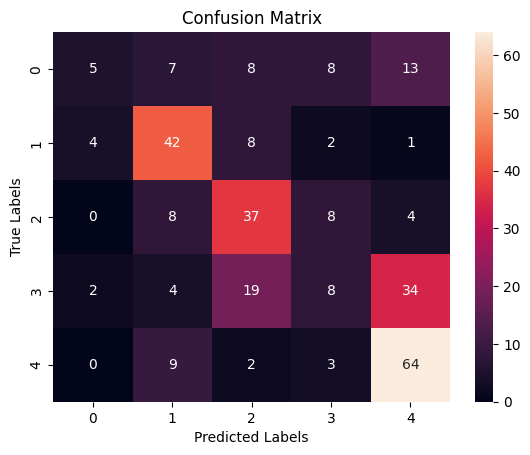

In [54]:
# Step 7: Plot confusion matrix using sns.heatmap with annot=True and fmt='d' and the appropriate xlabel and ylabel
# (5 points)


ConMat_HM = sns.heatmap(con_mat, annot=True, fmt="d")
ConMat_HM.set_xlabel("Predicted Labels")
ConMat_HM.set_ylabel("True Labels")
ConMat_HM.set_title("Confusion Matrix")


**Task 3: Precision-Recall Curve**

In [55]:
from sklearn.metrics import precision_recall_curve, f1_score

def plot_precision_recall_curve(X, y):
    """
    This function should
    1. Train a logistic regression classifier with max_iter=10000
    2. Plot the precision recall curve for the model
    3. Return the optimal threshold (based on max F1 score) and max F1 score
    """
    # Split the dataset into training and testing sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train a Logistic Regression classifier with max_iter=10000
    logreg_model = LogisticRegression(max_iter = 10000)
    logreg_model.fit(X_train, y_train)

    # Calculate probability scores for the test set and calculate precision and recall values for different thresholds (i.e using precision_recall_curve from sklearn.metrics)
    # (5 points)
    pred_prob = logreg_model.predict_proba(X_test)
    # (5 points)
    logreg_pre, logreg_recall, thresholds = precision_recall_curve(y_test, pred_prob[:,1])
    # Calculate F1-score for each threshold and find the optimal threshold
    # HINT: use np.argmax
    # (10 points)
    f1Scores = []
    for i in range(len(logreg_pre)):
      f1Scores.append((2 * logreg_pre[i] * logreg_recall[i]) / (logreg_pre[i] + logreg_recall[i]))

    best_thresh = thresholds[np.argmax(f1Scores)]
    bigF1 = f1Scores[np.argmax(f1Scores)]

    # Plot the Precision-Recall curve
    # (10 points)
    plt.plot(logreg_recall, logreg_pre, marker = ".", label = "Precision-Recall Curve")
    plt.title("Precision Recall Curve")
    plt.xlabel("Recall (Positive Label: 1)")
    plt.ylabel("Precision (Positive Label: 1)")
    plt.legend()
    plt.grid()
    # return the optimal threshold (based on max F1 score) and max F1 score
    return best_thresh, bigF1


Optimal Threshold: 0.194731341535529
Max F1-Score: 0.7499999999999999


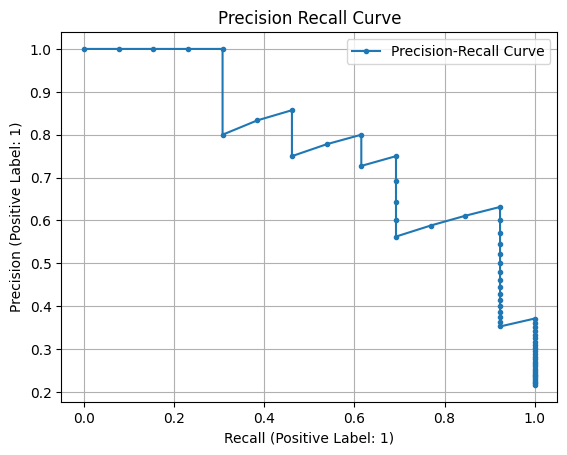

In [56]:
# DO NOT MODIFY! Simply run this cell after completing the plot_precision_recall_curve function

X, y = make_classification(n_samples=200, n_features=5, n_classes=2,
                           weights=[0.8, 0.2], n_informative=2, random_state=42)

optimal_threshold, max_f1_score = plot_precision_recall_curve(X, y)
print("Optimal Threshold:", optimal_threshold)
print("Max F1-Score:", max_f1_score)

**Task 4: Reciever Operating Characteristic (ROC) and Area Under the Curve (AUC)**

In [57]:
from sklearn.metrics import roc_curve, auc

def plot_roc_auc(X, y):
    """
    This function should:
    1. Train a logistic regression classifier with max_iter=10000
    2. Plot the ROC curve and calculate and return the AUC score
    """
    # Split the dataset into training and testing sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train a Logistic Regression classifier with max_iter=10000
    logreg_model = LogisticRegression(max_iter = 10000)
    logreg_model.fit(X_train, y_train)

    # Calculate probability scores for the test set and the ROC curve and AUC
    # (15 points)
    pred_prob = logreg_model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1])
    auc_score = auc(fpr, tpr)


    # Plot the ROC curve with proper xlabel, ylabel, title, and legend
    # Also plot the ROC curve for a random classifier on top of it (no need to create a random classifier just draw the line)
    # (15 points)
    plt.plot(fpr, tpr, marker = ".", label = "ROC Curve")
    rcTicks = [0, 0.2, 0.3, 0.4, 0.6, 0.8, 1]
    plt.plot(rcTicks, rcTicks, linestyle = 'dashed', marker = ".", label = "Random Classifier")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.legend()
    plt.grid()

    # return auc score
    return auc_score


AUC (Area Under the Curve): 0.9148936170212767


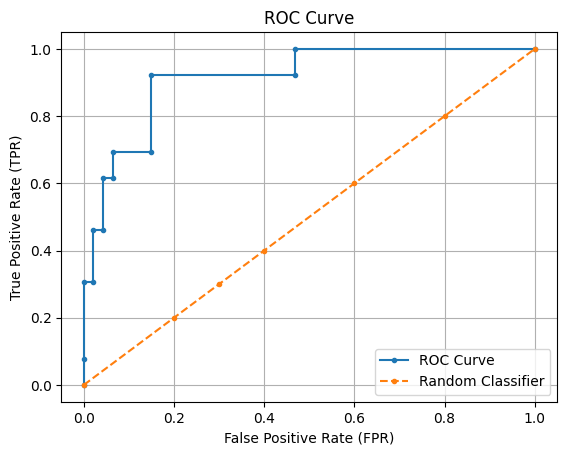

In [58]:
# DO NOT MODIFY! Simply run this cell after completing the plot_roc_auc function

roc_auc = plot_roc_auc(X, y)

print("\nAUC (Area Under the Curve):", roc_auc)